In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('data/automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### dự đoán price dựa vào engine-size sử dụng đa thức bậc 2

In [6]:
#import thư viện
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [5]:
# chuẩn bị dữ liệu X, y
X = df[['engine-size']]
y = df['price']

In [7]:
# khởi tạo đa thức bậc 2
pf = PolynomialFeatures(degree=2)

In [8]:
# biến đổi dữ liệu về đa thức bậc 2
X_pf = pf.fit_transform(X)

In [9]:
X_pf.shape

(201, 3)

In [10]:
# chia dữ liệu thành train và test theo tỉ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size = 0.2)

In [11]:
# khởi tạo model
model = LinearRegression()

In [12]:
# huấn luyện model (train model)
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# sử dụng model để dự đoán price dựa vào bộ train
yhat_train = model.predict(X_train)

In [14]:
y_train[:5]

32      6529.0
24      6692.0
185    11595.0
114    18150.0
158     9258.0
Name: price, dtype: float64

In [15]:
yhat_train[:5]

array([ 7459.22967226,  7102.14855112, 10470.89469477, 14823.34098921,
        8526.97713369])

In [16]:
# kiểm tra trên bộ test
yhat_test = model.predict(X_test)

In [17]:
y_test[:5]

135     7053.0
80     14869.0
83      8189.0
145    11694.0
122    22018.0
Name: price, dtype: float64

In [18]:
yhat_test[:5]

array([10294.90322941, 18578.18617269, 12745.52844939, 10294.90322941,
       17731.00292715])

In [19]:
# đo lường các chỉ số để đánh giá model: R-squared và MSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [20]:
# tính R-squared
print('R-squared train data:', round(model.score(X_train, y_train) * 100, 2), '%')
print('R-squared test data:', round(model.score(X_test, y_test) * 100, 2), '%')

R-squared train data: 76.07 %
R-squared test data: 74.43 %


In [21]:
# tính MSE và MAE
print('MSE train data:', mean_squared_error(y_train, yhat_train))
print('MSE test data:', mean_squared_error(y_test, yhat_test))

print('MAE train data:', mean_absolute_error(y_train, yhat_train))
print('MAE test data:', mean_absolute_error(y_test, yhat_test))

MSE train data: 16407182.403520817
MSE test data: 10057772.093032295
MAE train data: 2933.7697603655333
MAE test data: 2507.6301312823634


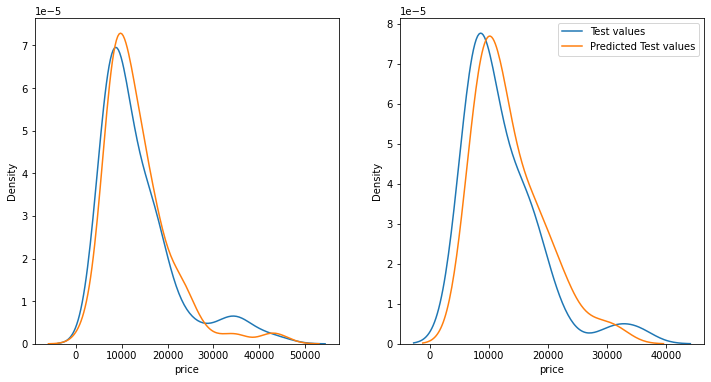

In [22]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.distplot(y_train, label = 'Train values', hist=False)
sns.distplot(yhat_train, label = 'Predicted Train values', hist=False)

plt.subplot(1,2,2)
sns.distplot(y_test, label = 'Test values', hist=False)
sns.distplot(yhat_test, label = 'Predicted Test values', hist=False)
plt.legend()
plt.show()